# Dimensionless Finite-Temperature Vertex Function Convergence Plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

import finite_temperature_vertex as ftv

In [2]:
eps = sp.symbols('eps')

In [3]:
def real_finite_part(expr):
    """Return the real finite part of expr."""
    return complex(expr.subs(eps, 0)).real

In [4]:
q1_eucl = [1, 0, 0, 0]
q2_eucl = [1, 0, 0, 0]
xis = 1, 1, 1
a = 3

In [5]:
n_max = 50

In [6]:
uncorrected_results =\
    ftv.dimless_vertex_partial_sum_sequence(q1_eucl, q2_eucl, xis, a, n_max, add_zeta_correction=False)

In [7]:
corrected_results =\
    ftv.dimless_vertex_partial_sum_sequence(q1_eucl, q2_eucl, xis, a, n_max, add_zeta_correction=True)

In [8]:
uncorrected_parsums = np.array([real_finite_part(parsum) for parsum in uncorrected_results[0]])
corrected_parsums = np.array([real_finite_part(parsum) for parsum in corrected_results[0]])

In [10]:
uncorrected_parsums_err = np.array([real_finite_part(parsum) for parsum in uncorrected_results[1]])
corrected_parsums_err = np.array([real_finite_part(parsum) for parsum in corrected_results[1]])

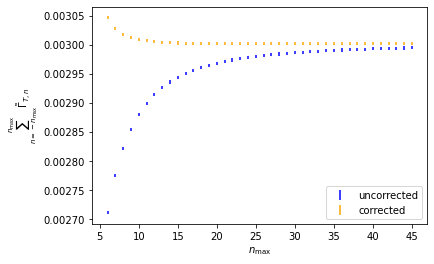

In [58]:
n_grid = np.arange(0, n_max + 1)
n_start = 6
n_stop = 46
fig, ax = plt.subplots()
ax.errorbar(n_grid[n_start:n_stop], uncorrected_parsums[n_start:n_stop], yerr=uncorrected_parsums_err[n_start:n_stop],
            fmt='None', color='blue', label='uncorrected')
ax.errorbar(n_grid[n_start:n_stop], corrected_parsums[n_start:n_stop], yerr=corrected_parsums_err[n_start:n_stop],
           fmt='None', color='orange', label='corrected')
ax.set_xlabel(r'$n_{\max}$', fontsize=10)
ax.set_ylabel(r'$\sum_{n=-n_{\max}}^{n_{\max}}\tilde{\Gamma}_{T,n}$', fontsize=10)
ax.legend(loc='lower right')